# 데이터 프레임을 이용한 대한민국 지도 그리기 샘플
참고(參考) : 파이썬으로 데이터 주무르기 - 5장 (출판: BJPUBLIC, 2017)  
원본 소스 제작: PinkWink (https://github.com/PinkWink)  
수정 : Phase2920(2019.09.26)
  
설명(設明): 원본 소스를 활용하여, 샘플 데이터프레임에 맞게 값들을 집어넣으면, 바로 활용할 수 있도록 하였습니다.  
이용하시기 전에, 주의사항을 잘 읽어주세요.
  
주의(注意):
1. 광역시도와 지역명은 가나다순으로 정렬되어있습니다.  
2. 여기서 이용한 샘플 데이터는 난수로 만들어진 파일이므로 데이터로써 가치가 없습니다.
3. 한반도 전체를 그린 지도가 아니므로 북한지역은 표시되지 않습니다.
4. 이용하려면 import에 있는 패키지를 모두 설치하셔야 합니다.

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline

#글꼴 설정 : 한글 깨짐을 방지합니다.
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [2]:
draw_korea_raw = pd.read_excel('C:/Korea_Map_Draw/Korea_Draw_raw.xlsx', encoding="EUC-KR")
draw_korea_raw
#엑셀로 저장된 지도그림을 불러옵니다.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [3]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},
                              inplace=True)

draw_korea_raw_stacked.head()
#지역 위치 잡기

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [4]:
draw_korea = draw_korea_raw_stacked #변수명을 다시 재지정하겠습니다.

In [5]:
#지역별 경계선 그리기

BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

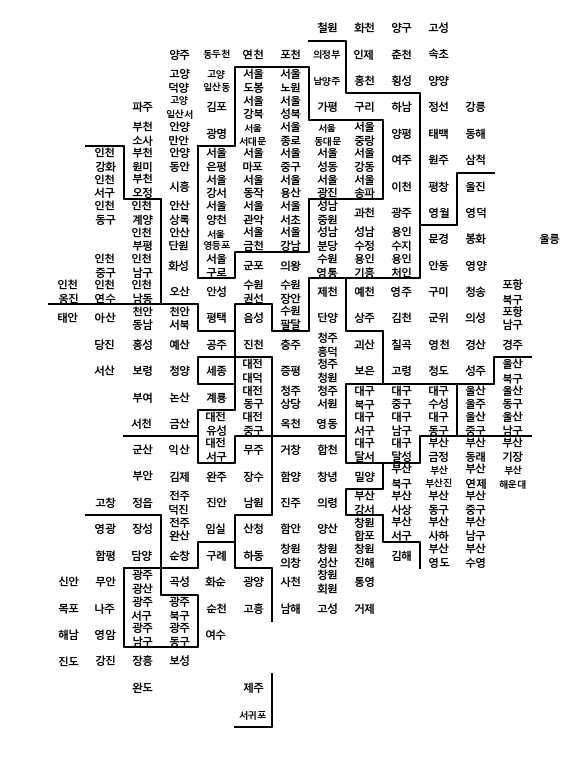

In [6]:
#지도에 나타내기

plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 중복방지를 위해서 시단위 이름도 같이 표시합니다.
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시합니다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계를 그립니다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=2)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
#전국 행정구역의 리스트를 불러옵니다.
draw_korea['ID'].unique()

array(['철원', '화천', '양구', '고성(강원)', '양주', '동두천', '연천', '포천', '의정부', '인제',
       '춘천', '속초', '고양 덕양', '고양 일산동', '서울 도봉', '서울 노원', '남양주', '홍천', '횡성',
       '양양', '파주', '고양 일산서', '김포', '서울 강북', '서울 성북', '가평', '구리', '하남',
       '정선', '강릉', '부천 소사', '안양 만안', '광명', '서울 서대문', '서울 종로', '서울 동대문',
       '서울 중랑', '양평', '태백', '동해', '인천 강화', '부천 원미', '안양 동안', '서울 은평',
       '서울 마포', '서울 중구', '서울 성동', '서울 강동', '여주', '원주', '삼척', '인천 서구',
       '부천 오정', '시흥', '서울 강서', '서울 동작', '서울 용산', '서울 광진', '서울 송파', '이천',
       '평창', '울진', '인천 동구', '인천 계양', '안산 상록', '서울 양천', '서울 관악', '서울 서초',
       '성남 중원', '과천', '광주', '영월', '영덕', '인천 부평', '안산 단원', '서울 영등포',
       '서울 금천', '서울 강남', '성남 분당', '성남 수정', '용인 수지', '문경', '봉화', '울릉',
       '인천 중구', '인천 남구', '화성', '서울 구로', '군포', '의왕', '수원 영통', '용인 기흥',
       '용인 처인', '안동', '영양', '인천 옹진', '인천 연수', '인천 남동', '오산', '안성',
       '수원 권선', '수원 장안', '제천', '예천', '영주', '구미', '청송', '포항 북구', '태안',
       '아산', '천안 동남', '천안 서북', '평택', '음성', '수원 팔달', '단양', '상주', '김천',
       '

In [8]:
#지도에 색을 입혀봅시다.
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75 #색상의 밝기를 설정합니다.

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData]) #최소치
    vmax = max(blockedMap[targetData]) #최대치

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름을 표시합니다.
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시합니다.
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시합니다.
        if len(dispname.splitlines()[-1]) >= 3: #글자가 3자이상이면,
            fontsize, linespacing = 10.0, 1.1
        else: #그렇치 않으면,
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계를 그립니다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off') #축을 표시하지 않습니다.

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show() #위에서 처리한 결과를 시각화해줍니다.

In [9]:
#임의의 데이터 프레임
Sample_KD = pd.read_csv('c:/Korea_Map_Draw/Korea_Dataframe_Sample.csv', encoding="EUC-KR")

In [10]:
Sample_KD.head()

,광역시도,시도,x,y,ID,SUB-0,SUB-1,SUB-2,SUB-3,SUB-4,SUB-5,SUB-6,SUB-7,SUB-8,SUB-9,Percent(%)
0,강원도,강릉시,11,3,강릉,2.659422,7.385360,232.828262,338.534296,357.762347,225.157786,38.456574,776.896397,179.648025,44.244251,40.466503
1,강원도,고성군,10,0,고성(강원),47.018321,165.763340,146.359588,90.713332,196.652440,510.018859,145.127772,414.102622,394.238881,227.697600,46.476793
2,강원도,동해시,11,4,동해,59.509637,40.550173,112.447347,2.226615,251.113413,576.749787,65.593754,415.219475,454.857460,90.765856,38.506075
3,강원도,삼척시,11,5,삼척,80.475770,147.841542,58.791843,258.202037,61.377221,545.712266,235.714234,745.713129,608.733634,240.429324,56.033943
4,강원도,속초시,10,1,속초,64.208527,61.155339,104.337065,380.612223,150.192496,379.622170,65.088219,358.154593,748.140171,667.980241,52.201949


## 사용할 수 있는 컬러 목록
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r


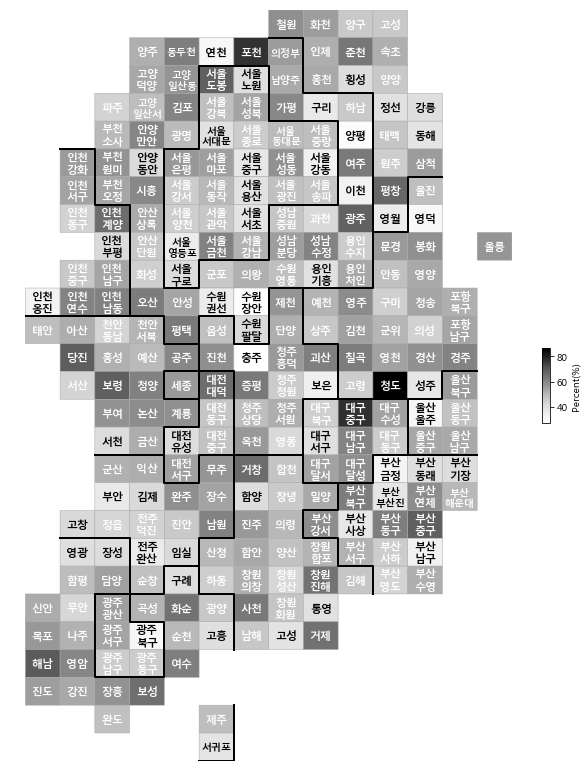

In [11]:
drawKorea('Percent(%)',Sample_KD,'Greys')